In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
dataset=pd.read_csv('covid_19_clean_complete.csv')
dataset=dataset.drop(columns=['Province/State'])
dataset['Result']=abs(dataset['Recovered']-(dataset['Confirmed']+dataset['Deaths']))
dataset=dataset.dropna(how='any')

dataset
 

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Result
0,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0,2.0
1,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0,2.0
2,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0,0.0
3,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0,0.0
4,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,Jersey,49.1900,-2.1100,3/23/20,0.0,0.0,0.0,0.0
19216,Puerto Rico,18.2000,-66.5000,3/23/20,0.0,1.0,0.0,1.0
19217,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0,0.0,0.0,0.0
19218,The Bahamas,24.2500,-76.0000,3/23/20,0.0,0.0,0.0,0.0


In [50]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,1]=le.fit_transform(X[:,1])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])



In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=10,random_state=0)
RFR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
y_pred=RFR.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  1.    1. ]
 [116.9 116. ]
 [  0.    0. ]
 ...
 [  0.    0. ]
 [  0.    0. ]
 [  0.    0. ]]


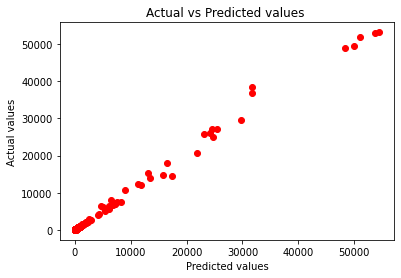

In [76]:
plt.scatter(y_test ,y_pred, color = 'red')
plt.title('Actual vs Predicted values ')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [57]:
from sklearn.metrics import r2_score
print (abs(r2_score(y_test, y_pred)*100))

99.41409455537084
